<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [13]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 113.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 95.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 12.0 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.


In [6]:
import yfinance as yf

# Step 1: Create the Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Step 2: Obtain historical data
tesla_data = tesla.history(period="max")

# Step 3: Reset the index
tesla_data.reset_index(inplace=True)

# Step 4: Save and display the first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


## Question 2: Use Webscraping to Extract Tesla Revenue Data


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. 


In [8]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch the Tesla revenue page (example URL)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"  # Replace with actual revenue data page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Find the revenue data table (you may need to inspect the page to get the correct tag)
table = soup.find('table')  # This assumes the first table is the one you want

# Step 3: Prepare lists to store the data
data = []

# Step 4: Loop through table rows and extract data
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    if len(cols) > 1:  # Ensure there are enough columns
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()  # Adjust index based on the actual structure of the table
        data.append([date, revenue])

# Step 5: Create a DataFrame from the data
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 6: Reset the index
tesla_revenue.reset_index(drop=True, inplace=True)

# Step 7: Display the last five rows
print(tesla_revenue.tail())


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


## Question 3: Use yfinance to Extract Stock Data


Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [9]:
import yfinance as yf

# Step 1: Create the Ticker object for GameStop
gme = yf.Ticker("GME")

# Step 2: Obtain historical data for the maximum available period
gme_data = gme.history(period="max")

# Step 3: Reset the index to make Date a column instead of the index
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607505   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Display the last five rows of the gme_revenue dataframe using the tail function.

In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set up the URL and fetch the page content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"  # Replace if necessary
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Locate the revenue data table in the HTML (use the appropriate tag and class)
table = soup.find("table", {"class": "historical_data_table table"})  # Adjust class name if different

# Step 3: Extract data from the table rows
data = []
for row in table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Step 4: Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 5: Display the last five rows
print(gme_revenue.tail())


    Date Revenue
0   2020  $6,466
1   2019  $8,285
2   2018  $8,547
3   2017  $7,965
4   2016  $9,364
5   2015  $9,296
6   2014  $9,040
7   2013  $8,887
8   2012  $9,551
9   2011  $9,474
10  2010  $9,078
11  2009  $8,806
12  2008  $7,094
13  2007  $5,319
14  2006  $3,092
15  2005  $1,843


## Question 5: Plot Tesla Stock Graph


Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

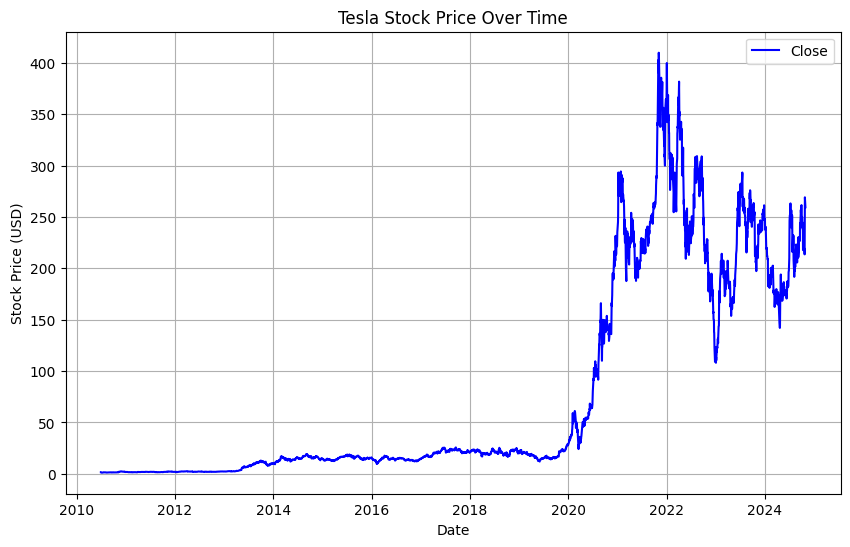

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Define the make_graph function
def make_graph(data, column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data[column], label=column, color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 2: Obtain Tesla stock data and reset the index
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Step 3: Call the make_graph function to plot the data
make_graph(tesla_data, "Close", "Tesla Stock Price Over Time")


## Question 6: Plot GameStop Stock Graph


Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

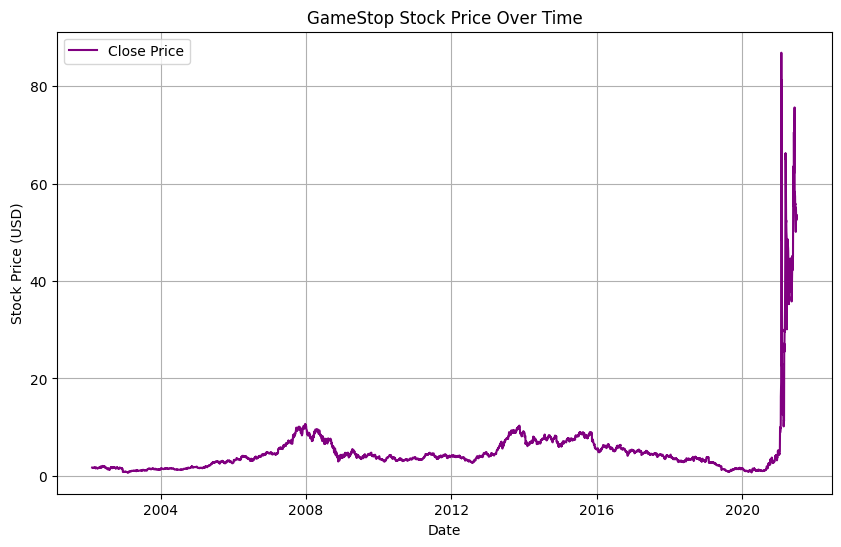

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define the make_graph function
def make_graph(data, revenue_data, title):
    # Filter data up to June 2021
    data = data[data['Date'] <= '2021-06-30']

    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price", color='purple')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(f"{title} Stock Price Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 2: Obtain GameStop stock data and reset the index
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Placeholder for gme_revenue DataFrame (as per function structure)
gme_revenue = pd.DataFrame()  # Normally would be populated with actual revenue data if needed

# Step 3: Call the make_graph function to plot the data
make_graph(gme_data, gme_revenue, 'GameStop')
